In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
titanic_data = pd.read_csv("train.csv")

In [ ]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


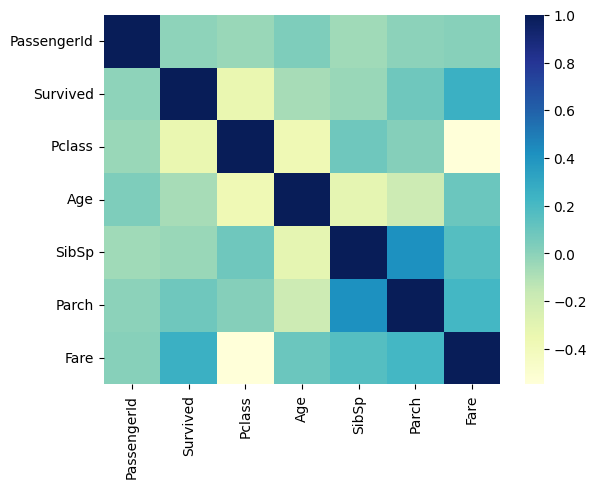

In [ ]:
import seaborn as sns

# Filter out non-numeric columns
numeric_data = titanic_data.select_dtypes(include=['float64', 'int64'])

# Generate the heatmap
sns.heatmap(numeric_data.corr(), cmap="YlGnBu")
plt.show()

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_indices, test_indices in split.split(titanic_data, titanic_data[["Survived", "Pclass", "Sex"]]):
    strat_train_set = titanic_data.loc[train_indices]
    strat_test_set = titanic_data.loc[test_indices]

# Display the first few rows of the training and test sets to verify the split
strat_train_set.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
867,868,0,1,"Roebling, Mr. Washington Augustus II",male,31.0,0,0,PC 17590,50.4958,A24,S
619,620,0,2,"Gavey, Mr. Lawrence",male,26.0,0,0,31028,10.5000,NaN,S
50,51,0,3,"Panula, Master. Juha Niilo",male,7.0,4,1,3101295,39.6875,NaN,S
286,287,1,3,"de Mulder, Mr. Theodore",male,30.0,0,0,345774,9.5000,NaN,S
834,835,0,3,"Allum, Mr. Owen George",male,18.0,0,0,2223,8.3000,NaN,S


In [ ]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 867 to 802
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          565 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        167 non-null    object 
 11  Embarked     710 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class AgeImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        imputer = SimpleImputer(strategy="mean")
        X['Age'] = imputer.fit_transform(X[['Age']])
        return X


In [ ]:
from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
      # Fit the OneHotEncoder on the categorical features
        encoder = OneHotEncoder()

        # Encode 'Embarked' column
        matrix = encoder.fit_transform(X[['Embarked']]).toarray()
        column_names = ["C", "S", "Q" , "N"]
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]

        # Encode 'Sex' column
        matrix = encoder.fit_transform(X[['Sex']]).toarray()
        column_names = ["Female", "Male"]
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]

        return X


In [ ]:
class FeatureDropper(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        # No fitting necessary for this transformer
        return self

    def transform(self, X):
        # Drop specified columns and ignore any that don't exist
        return X.drop(["Embarked", "Name", "Ticket", "Cabin", "Sex" , "N"], axis=1, errors="ignore")



In [ ]:
from sklearn.pipeline import Pipeline

# Create the pipeline with your custom transformers
pipeline = Pipeline([
    ("ageimputer", AgeImputer()),
    ("featureencoder", FeatureEncoder()),
    ("featuredropper", FeatureDropper())
])


In [ ]:
strat_train_set = pipeline.fit_transform(strat_train_set)

In [ ]:
strat_train_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
867,868,0,1,31.0,0,0,50.4958,0.0,0.0,1.0,0.0,1.0
619,620,0,2,26.0,0,0,10.5000,0.0,0.0,1.0,0.0,1.0
50,51,0,3,7.0,4,1,39.6875,0.0,0.0,1.0,0.0,1.0
286,287,1,3,30.0,0,0,9.5000,0.0,0.0,1.0,0.0,1.0
834,835,0,3,18.0,0,0,8.3000,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
482,483,0,3,50.0,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
518,519,1,2,36.0,1,0,26.0000,0.0,0.0,1.0,1.0,0.0
54,55,0,1,65.0,0,1,61.9792,1.0,0.0,0.0,0.0,1.0
603,604,0,3,44.0,0,0,8.0500,0.0,0.0,1.0,0.0,1.0


In [ ]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 867 to 802
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
 7   C            712 non-null    float64
 8   S            712 non-null    float64
 9   Q            712 non-null    float64
 10  Female       712 non-null    float64
 11  Male         712 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 72.3 KB


In [ ]:
from sklearn.preprocessing import StandardScaler

# Suppression de la colonne 'Survived' pour les features (X) et garder la colonne 'Survived' pour la cible (y)
X = strat_train_set.drop(['Survived'], axis=1)
y = strat_train_set['Survived']

# Standardisation des données
scaler = StandardScaler()
X_data = scaler.fit_transform(X)

# Conversion de y en numpy array
y_data = y.to_numpy()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Initialisation du classifieur RandomForest
clf = RandomForestClassifier()

# Définition de la grille de paramètres
param_grid = [
    {"n_estimators": [10, 100, 200, 500], "max_depth": [None, 5, 10], "min_samples_split": [2, 3, 4]}
]

# Initialisation de la recherche par grille
grid_search = GridSearchCV(clf, param_grid, cv=3, scoring="accuracy", return_train_score=True)

# Entraînement de la recherche par grille sur les données
grid_search.fit(X_data, y_data)


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [ ]:
# Récupérer le meilleur estimateur trouvé par GridSearchCV
final_clf = grid_search.best_estimator_

# Afficher le meilleur classifieur
final_clf

RandomForestClassifier(min_samples_split=3, n_estimators=500)

In [ ]:
# Transformer l'ensemble de test
strat_test_set = pipeline.fit_transform(strat_test_set)

In [ ]:
strat_test_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
659,660,0,1,58.00000,0,2,113.2750,1.0,0.0,0.0,0.0,1.0
119,120,0,3,2.00000,4,2,31.2750,0.0,0.0,1.0,1.0,0.0
875,876,1,3,15.00000,0,0,7.2250,1.0,0.0,0.0,1.0,0.0
67,68,0,3,19.00000,0,0,8.1583,0.0,0.0,1.0,0.0,1.0
644,645,1,3,0.75000,2,1,19.2583,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,1,3,33.00000,3,0,15.8500,0.0,0.0,1.0,1.0,0.0
687,688,0,3,19.00000,0,0,10.1708,0.0,0.0,1.0,0.0,1.0
538,539,0,3,29.44349,0,0,14.5000,0.0,0.0,1.0,0.0,1.0
279,280,1,3,35.00000,1,1,20.2500,0.0,0.0,1.0,1.0,0.0


In [ ]:
# Séparation des caractéristiques et de la cible dans l'ensemble de test
X_test = strat_test_set.drop(['Survived'], axis=1)
y_test = strat_test_set['Survived']

scaler = StandardScaler()

X_data_test = scaler.fit_transform(X_test)
y_data_test = y_test.to_numpy()


In [ ]:
final_clf.score(X_data_test , y_data_test)

0.8324022346368715

In [ ]:
final_data = pipeline.fit_transform(titanic_data)

In [ ]:
final_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
0,1,0,3,22.000000,1,0,7.2500,0.0,0.0,1.0,0.0,1.0
1,2,1,1,38.000000,1,0,71.2833,1.0,0.0,0.0,1.0,0.0
2,3,1,3,26.000000,0,0,7.9250,0.0,0.0,1.0,1.0,0.0
3,4,1,1,35.000000,1,0,53.1000,0.0,0.0,1.0,1.0,0.0
4,5,0,3,35.000000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0
887,888,1,1,19.000000,0,0,30.0000,0.0,0.0,1.0,1.0,0.0
888,889,0,3,29.699118,1,2,23.4500,0.0,0.0,1.0,1.0,0.0
889,890,1,1,26.000000,0,0,30.0000,1.0,0.0,0.0,0.0,1.0


In [ ]:
# Séparation des caractéristiques et de la cible dans l'ensemble de données final
X_final = final_data.drop(['Survived'], axis=1)
y_final = final_data['Survived']

scaler = StandardScaler()

X_data_final = scaler.fit_transform(X_final)
y_data_final = y_final.to_numpy()


In [ ]:
# Initialisation du classifieur RandomForest
prod_clf = RandomForestClassifier()

# Définition de la grille de paramètres
param_grid = [
    {"n_estimators": [10, 100, 200, 500], "max_depth": [None, 5, 10], "min_samples_split": [2, 3, 4]}
]

# Initialisation de la recherche par grille
grid_search = GridSearchCV(prod_clf, param_grid, cv=3, scoring="accuracy", return_train_score=True)

# Entraînement de la recherche par grille sur les données
grid_search.fit(X_data_final, y_data_final)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [ ]:
# Récupérer le meilleur estimateur trouvé par GridSearchCV
prod_final_clf = grid_search.best_estimator_

# Afficher le meilleur classifieur
prod_final_clf

RandomForestClassifier(max_depth=5, min_samples_split=4)